In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report

In [2]:
df = pd.read_csv("../../data/classification_ready_data.csv")

df.shape

(1364460, 17)

In [3]:
df.sample(6)

,engine_capacity_(cc),vehicle_type,latitude,age_of_driver,longitude,cluster_1,day_of_year,rltv_hum,dewpoint,ground_state_id,age_of_vehicle,wind_speed,air_temperature,wind_direction,hour,cld_ttl_amt_id,accident
1182545,-1.0,1.0,50.741821,77.0,-1.697809,47006.0,114.0,73.324330,6.958993,2.213359,-1.0,14.106580,11.666409,148.480602,11.0,6.699226,1.0
186221,-1.0,9.0,51.305848,45.0,-0.570112,25937.0,244.0,51.400000,8.800000,8.207632,-1.0,4.000000,19.100000,80.000000,12.0,4.261416,1.0
1154674,2198.0,19.0,54.794096,60.0,-1.527137,11454.0,245.0,63.600000,10.900000,7.089713,5.0,6.000000,17.900000,90.000000,15.0,7.217739,1.0
544634,501.0,19.0,53.762376,47.0,-0.274538,36332.0,109.0,71.691165,3.395522,10.112867,6.0,3.991252,8.206396,239.317852,10.0,1.058302,0.0
319662,628.0,8.0,54.523598,86.0,-1.557954,44126.0,177.0,74.800000,11.300000,1.000000,9.0,8.000000,15.800000,50.000000,17.0,6.000000,0.0
1019981,1390.0,9.0,51.603767,25.0,-0.383299,47605.0,221.0,67.804936,7.730318,7.089712,4.0,10.550103,13.597722,271.551319,19.0,2.129457,1.0


In [4]:
df.columns

Index(['engine_capacity_(cc)', 'vehicle_type', 'latitude', 'age_of_driver',
       'longitude', 'cluster_1', 'day_of_year', 'rltv_hum', 'dewpoint',
       'ground_state_id', 'age_of_vehicle', 'wind_speed', 'air_temperature',
       'wind_direction', 'hour', 'cld_ttl_amt_id', 'accident'],
      dtype='object')

### data split

In [5]:
all_feature_cols = list(df.columns)
all_feature_cols.remove('accident')

X = df[all_feature_cols] 
y = df['accident']

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train dimension = ', X_train.shape)
print('X_test  dimension = ', X_test.shape)
print('y_train dimension = ', y_train.shape)
print('y_train dimension = ', y_test.shape)

X_train dimension =  (955122, 16)
X_test  dimension =  (409338, 16)
y_train dimension =  (955122,)
y_train dimension =  (409338,)


### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(dual=False, max_iter=120000)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=120000)

In [7]:
y_pred = model_logreg.predict(X_test)
print("Accuracy [LOG REG]:",metrics.accuracy_score(y_test, y_pred))
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy [LOG REG]: 0.7510565840454587


              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73    204766
         1.0       0.71      0.83      0.77    204572

    accuracy                           0.75    409338
   macro avg       0.76      0.75      0.75    409338
weighted avg       0.76      0.75      0.75    409338



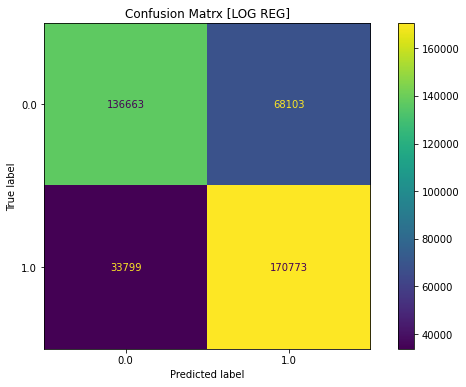

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [LOG REG]')
disp =metrics.plot_confusion_matrix(model_logreg, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train,y_train)

In [ ]:
y_pred = model_svm.predict(X_test)
print("Accuracy [SVM]:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [SVM]')
disp =metrics.plot_confusion_matrix(model_svm, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
model_rf = RandomForestClassifier(random_state=43)      
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

In [7]:
y_pred = model_rf.predict(X_test)
print("Accuracy [RFC]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [RFC]: 0.9731517718853369


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97    204766
         1.0       0.97      0.98      0.97    204572

    accuracy                           0.97    409338
   macro avg       0.97      0.97      0.97    409338
weighted avg       0.97      0.97      0.97    409338



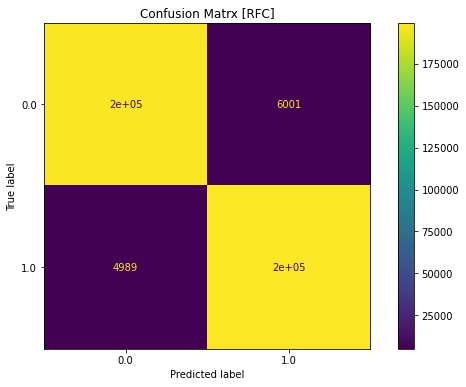

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [RFC]')
disp =metrics.plot_confusion_matrix(model_rf, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

### Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_dt_clf_1 = DecisionTreeClassifier()
model_dt_clf_1.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model_dt_clf_1.predict(X_test)
print("Accuracy [Decision Tree (gini)]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [Decision Tree (gini)]: 0.9678407575157938


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    204766
         1.0       0.97      0.97      0.97    204572

    accuracy                           0.97    409338
   macro avg       0.97      0.97      0.97    409338
weighted avg       0.97      0.97      0.97    409338



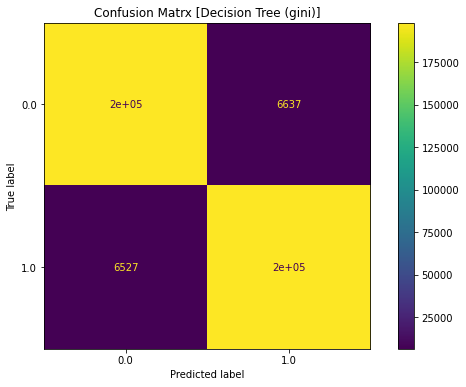

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [Decision Tree (gini)]')
disp =metrics.plot_confusion_matrix(model_dt_clf_1, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

In [16]:
model_dt_clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_dt_clf_2 = model_dt_clf_2.fit(X_train,y_train)

In [22]:
y_pred = model_dt_clf_2.predict(X_test)
print("Accuracy [Decision Tree (entropy)]:",metrics.accuracy_score(y_test, y_pred))

Accuracy [Decision Tree (entropy)]: 0.9036615217741817


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91    204766
         1.0       0.95      0.85      0.90    204572

    accuracy                           0.90    409338
   macro avg       0.91      0.90      0.90    409338
weighted avg       0.91      0.90      0.90    409338



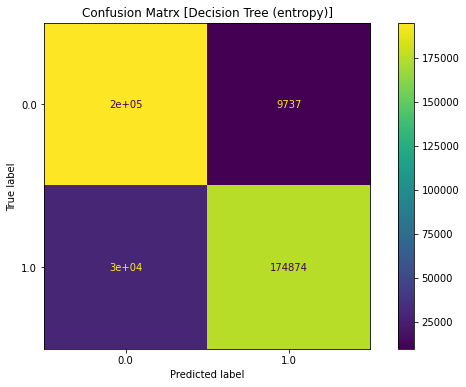

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx [Decision Tree (entropy)]')
disp =metrics.plot_confusion_matrix(model_dt_clf_2, X_test, y_test, ax = ax)
disp.confusion_matrix
print(metrics.classification_report(y_test, y_pred))

# output

Random Forest Classifier and Decision Tree with gini criterion have higher accuracy >96

In [26]:
import pickle

# serialize models

pickle.dump(model_rf, open('./models/rf_v1.model', 'wb'))
pickle.dump(model_dt_clf_1, open('./models/dt_v1.model', 'wb'))


In [11]:
record_template = df.head(1)
record_template = record_template.drop(['accident'], axis=1)
record_template.loc[0,record_template.columns] = np.nan
pickle.dump(record_template, open("./models/record_v1.template", 'wb'))